A scene with mirrors rendered with vapory (see http://blog.invibe.net/posts/2015-01-16-rendering-3d-scenes-in-python.html )

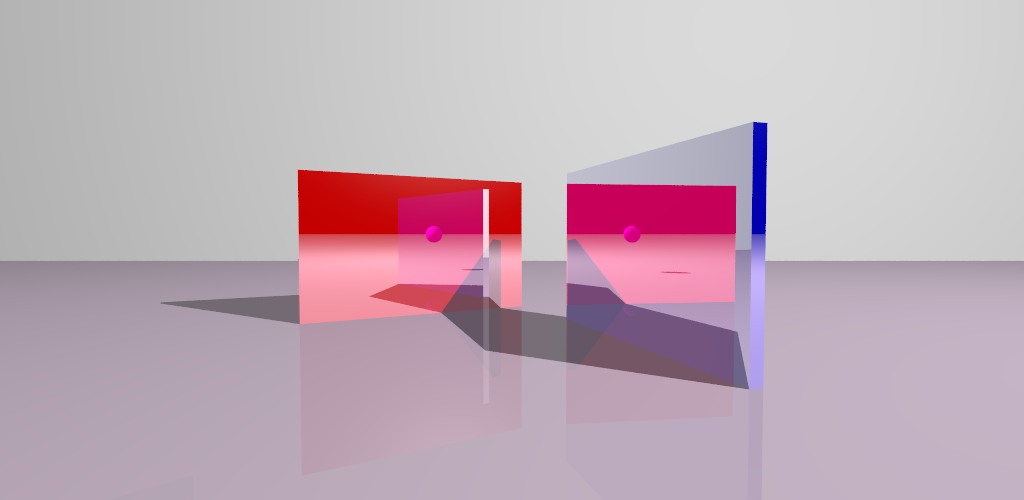

In [1]:
%load_ext autoreload
%autoreload 2
from vapory import *
import numpy as np

W, H = 1024, 500

lx, ly, lz = .2, 3.0, 5.0 # épaisseur, hauteur, largeur
location = [0, 1.75, -8]
head_size = .4
look_at = [0, 1.5, 0]
head_location = np.array(location) - np.array([0, 0, head_size])
antialiasing = 0.001 # The nearer from zero, the more precise the image.
quality = 120
light_intensity = 1.

light = LightSource([15, 15, -10], 'color', [light_intensity]*3)
wall = Plane([0, 0, 1], 0, Texture(Pigment('color', [1, 1, 1])), 'translate', (0, 0, 25))
ground = Plane( [0, 1, 0], 0,
                Texture( Pigment( 'color', [1, .8, 1, 0.2]),
                         Finish( 'phong', 0.1,
                                 'reflection',0.1,
                                 'metallic', 0.1)))

# for transformations, see http://www.povray.org/documentation/view/3.6.1/49/
reflection = 1.

plane1 = Box([-lx/2, 0, -lz/2], [lx/2, ly, lz/2], Pigment('color', [0, 0, 1]),
                                  Finish('phong', 0.8, 'reflection', reflection), 
                     'rotate', (0, -18, 0),
                     'translate', (2, 0, 0))
plane2 = Box([-lx/2, 0, -lz/2], [lx/2, ly, lz/2], Pigment('color', [1, 0, 0]),
                                  Finish('phong', 0.8, 'reflection', reflection),
                     'rotate', (0, 61, 0),
                     'translate', (-2, 0, 3))

me = vapory.Sphere( head_location, head_size, vapory.Texture( vapory.Pigment( 'color', [1, 0, 1] )))

scene = Scene( Camera("location", location, "look_at", look_at),
               objects = [ ground, wall, light, plane1, plane2, me],
               included=["glass.inc"])
scene.render('ipython', width=W, height=H,
             antialiasing = antialiasing, # The nearer from zero, the more precise the image.
              quality=quality)

Let's sort out coordinates... see http://wiki.povray.org/content/Documentation:Tutorial_Section_2

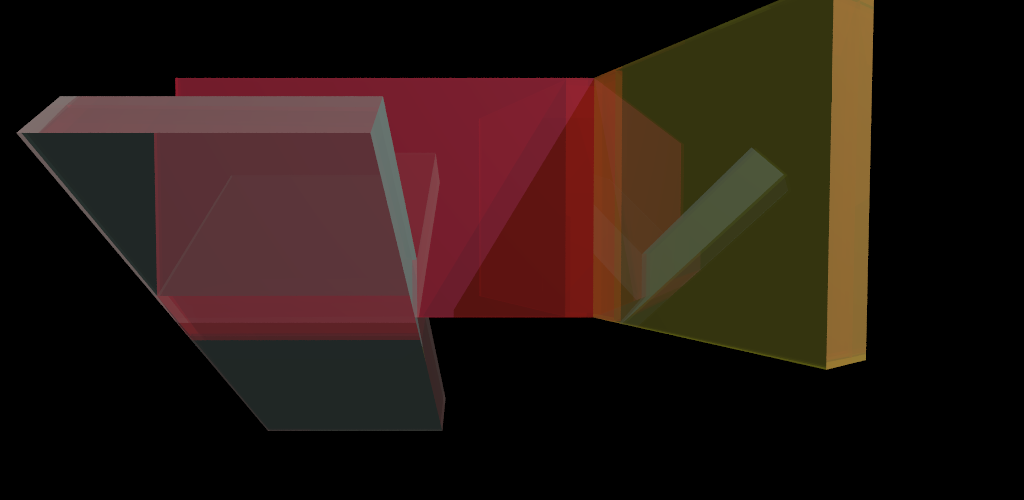

In [2]:
light_intensity = 10.

light = LightSource([15, 15, -10], 'color', [light_intensity]*3)

def vapory_box(lhw, xyz, R, tex='T_Ruby_Glass'):
    """ 
    Draws a box on the floor rotates it and then moves it at the given position
    
    """
    return Box([-lhw[0]/2, 0, -lhw[2]/2], [lhw[0]/2, lhw[1],lhw[2]/2],
                Texture(tex), Interior('ior', 10),
                'rotate', R,
                'translate', xyz)

scene = Scene( Camera("location", location, "look_at", look_at),
               objects = [ light, # ground, wall,
                         vapory_box((10, 5., 1), (-2, 0, 3), (0, 0, 0), tex='T_Ruby_Glass'),
                         vapory_box((10, 5., 1), (2, 0, 3), (0, 60, 0), tex='T_Yellow_Glass'),
                         vapory_box((10, 5., 1), (-2, 0, 3), (0, 45, 90), tex='T_Green_Glass')],
               included=["glass.inc", "textures.inc", "glass.inc"])
scene.render('ipython', width=W, height=H,
             antialiasing = antialiasing, # The nearer from zero, the more precise the image.
              quality=quality)

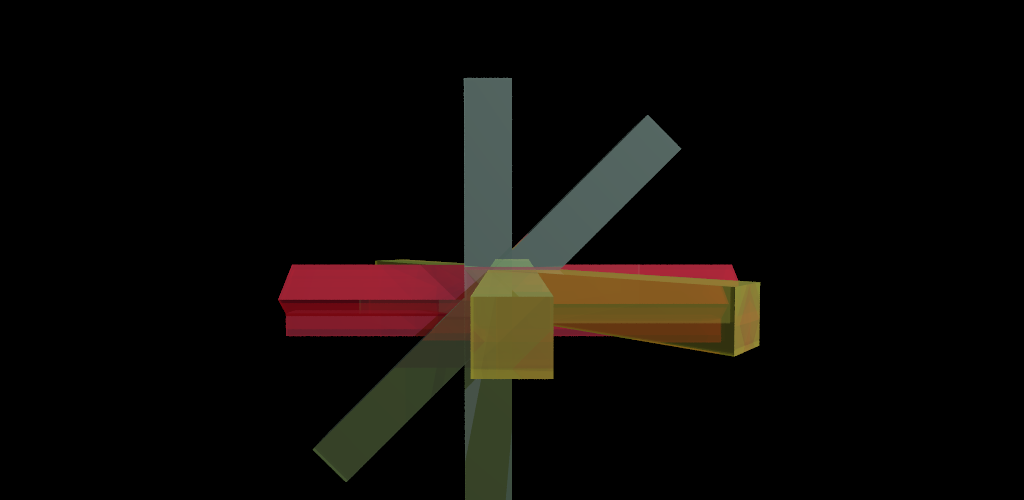

In [3]:
scene = Scene( Camera("location", location, "look_at", look_at),
               objects = [ light, # ground, wall,
                         vapory_box((10, 1., 1), (0, 0, 3), (45, 0, 0), tex='T_Ruby_Glass'),
                         vapory_box((10, 1., 1), (0, 0, 3), (0, 45, 0), tex='T_Yellow_Glass'),
                         vapory_box((10, 1., 1), (0, 0, 3), (0, 0, 45), tex='T_Green_Glass'),
                         vapory_box((10, 1., 1), (0, 0, 3), (90, 0, 0), tex='T_Ruby_Glass'),
                         vapory_box((10, 1., 1), (0, 0, 3), (0, 90, 0), tex='T_Yellow_Glass'),
                         vapory_box((10, 1., 1), (0, 0, 3), (0, 0, 90), tex='T_Green_Glass')],
               included=["glass.inc", "textures.inc", "glass.inc"])
scene.render('ipython', width=W, height=H, antialiasing = antialiasing, quality=quality)

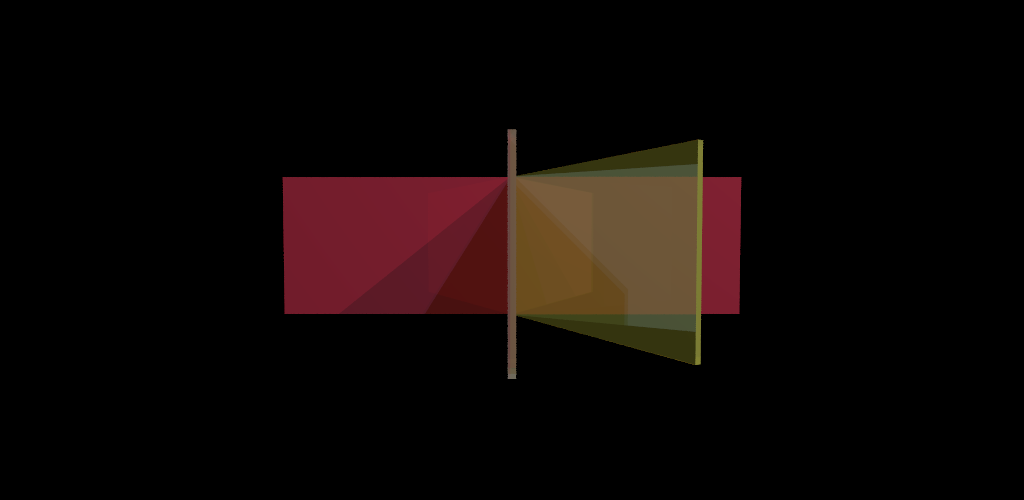

In [4]:
scene = Scene( Camera("location", location, "look_at", look_at),
               objects = [ light, # ground, wall,
                         vapory_box((10, 3., .1), (0, 0, 3), (0, 0, 0), tex='T_Ruby_Glass'),
                         vapory_box((10, 3., .1), (0, 0, 3), (0, 60, 0), tex='T_Yellow_Glass'),
                         vapory_box((10, 3., .1), (0, 0, 3), (0, 90, 0), tex='T_Green_Glass')],
               included=["glass.inc", "textures.inc", "glass.inc"])
scene.render('ipython', width=W, height=H, antialiasing = antialiasing, quality=quality)

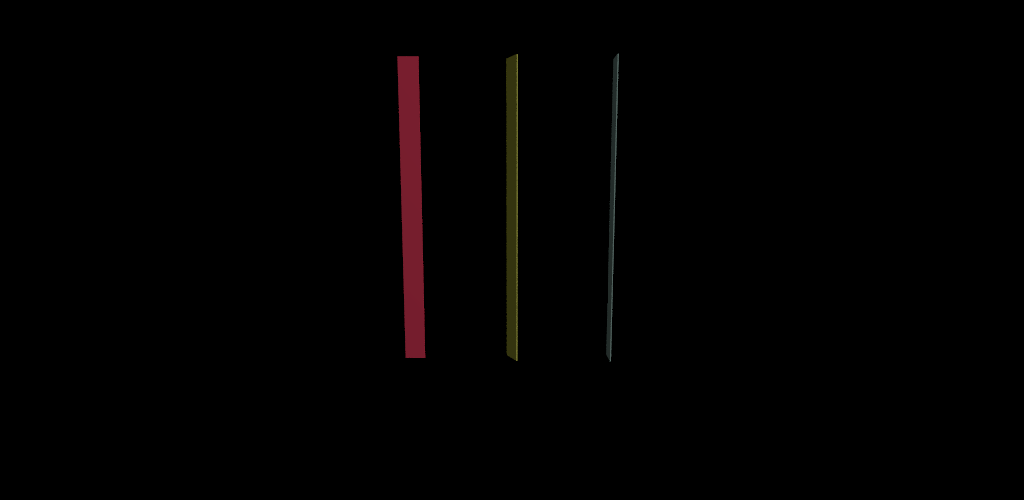

In [5]:
location = [0, 1.75, -2]
scene = Scene( Camera("location", location, "look_at", look_at),
               objects = [ light, # ground, wall,
                         vapory_box((.2, 3., .01), (-1, 0, 3), (0, 0, 0), tex='T_Ruby_Glass'),
                         vapory_box((.2, 3., .01), (0, 0, 3), (0, 60, 0), tex='T_Yellow_Glass'),
                         vapory_box((.2, 3., .01), (1, 0, 3), (0, 90, 0), tex='T_Green_Glass')],
               included=["glass.inc", "textures.inc", "glass.inc"])
scene.render('ipython', width=W, height=H, antialiasing = antialiasing, quality=quality)

including a background:

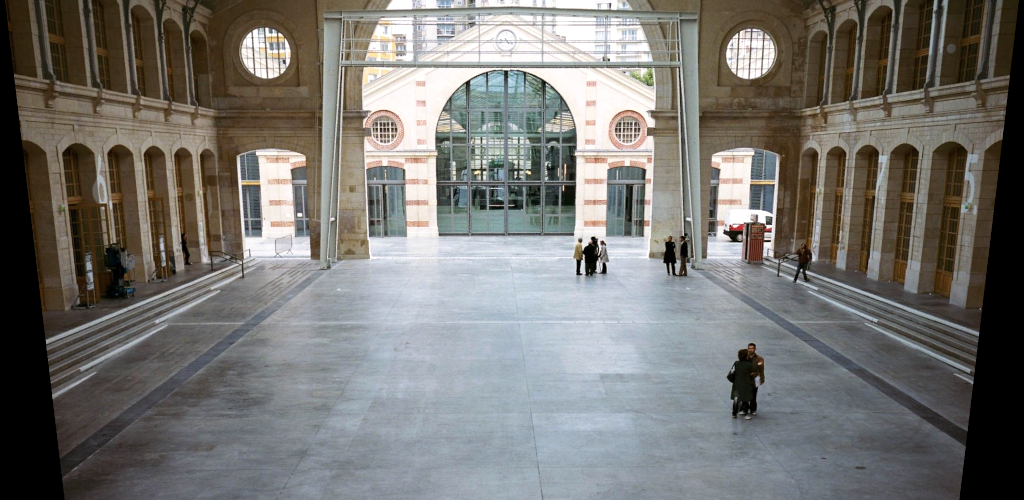

In [6]:
background_depth = 100
foreground = Box([0, 0, 0], [1, 1, 1], 
                 Texture(Pigment(ImageMap('png', '"../files/VISUEL_104.png"', 'once')),
                         Finish('ambient', 1.2) ),
                 'scale', [background_depth, background_depth, 0],
                 'translate', [-background_depth/2, -.45*background_depth, background_depth/2])

scene = Scene( Camera("location", location, "look_at", look_at),
               objects = [foreground],# ground
               included=["glass.inc"] )
scene.render('ipython', width=W, height=H,
             antialiasing = antialiasing, # The nearer from zero, the more precise the image.
              quality=quality)

un Background derriere, un miroir devant, je devrais me voir...

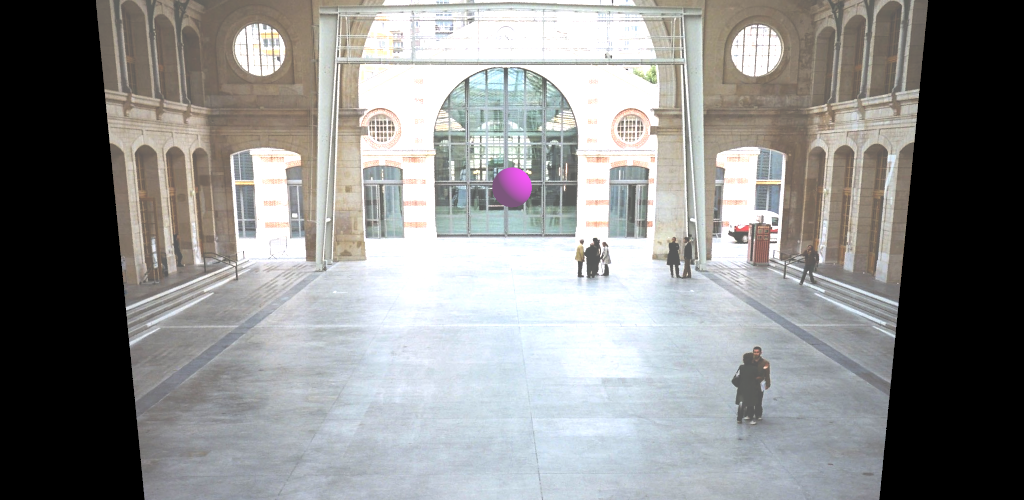

In [7]:
light_intensity = 1.2
light = LightSource([15, 15, 1], 'color', [light_intensity]*3)

lx, ly, lz = 3, 2.5, .2 # épaisseur, hauteur, largeur
mirror = Box([-.5, 0, -.5], [.5, 1, .5],
             Pigment('color', [1, 1, 1]),
             Finish('phong', 0.8, 'reflection', 1.),
             'scale', [lx, ly, lz],
             'rotate', (0, 0, 0),
             'translate', (0, 0, 0))

background = Box([0, 0, 0], [1, 1, 1], 
                 Texture(Pigment(ImageMap('png', '"../files/VISUEL_104.png"', 'once')),
                         Finish('ambient', 1.2) ),
                 'scale', [background_depth, background_depth, 0],
                 'translate', [-background_depth/2, -.45*background_depth, -background_depth/2])

scene = Scene( Camera("location", location, "look_at", look_at),
#               objects = [background,  ground, mirror, light],
               objects = [background,  mirror, me, light],
               included=["glass.inc"] )
scene.render('ipython', width=W, height=H,
             antialiasing = antialiasing, # The nearer from zero, the more precise the image.
              quality=quality)

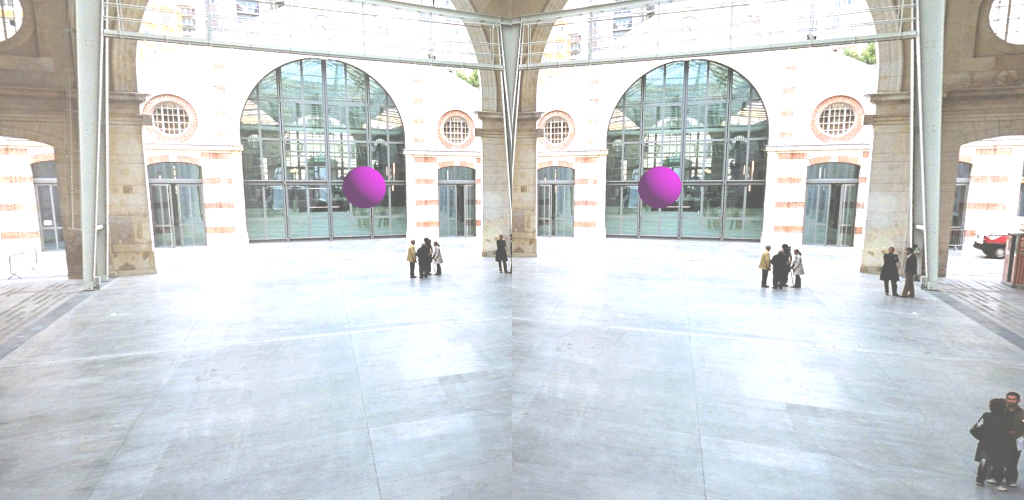

In [8]:
# for transformations, see http://www.povray.org/documentation/view/3.6.1/49/
reflection = 1.

plane1 = Box([-.5, 0, -.5], [.5, 1, .5], Pigment('color', [1, 1, 1]),
                                  Finish('phong', 0.8, 'reflection', reflection),
                                   'scale', [lx, ly, lz], 'translate', (1, 0, 0), 'rotate', (0, 10, 0))
plane2 = Box([-.5, 0, -.5], [.5, 1, .5], Pigment('color', [1, 1, 1]),
                                  Finish('phong', 0.8, 'reflection', reflection),
                                   'scale', [lx, ly, lz], 'translate', (-1, 0, 0), 'rotate', (0, -10, 0))

scene = Scene( Camera("location", location, "look_at", look_at),
#               objects = [background,  ground, wall, plane1, plane2, light],
               objects = [foreground, background,  me, plane1, plane2, light],
               included=["glass.inc"] )
scene.render('ipython', width=W, height=H,
             antialiasing = antialiasing, # The nearer from zero, the more precise the image.
              quality=quality)

Animating it using moviepy


  warn(skimage_deprecation('The `skimage.filter` module has been renamed '




[MoviePy] Building file anim.gif with imageio



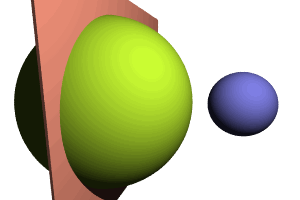

In [ ]:
from vapory import *

color = lambda col: Texture( Pigment( 'color', col))

def scene(t):
    """ Returns the scene at time 't' (in seconds) """
    return Scene( Camera( 'location', [0, 2, -3], 'look_at',  [1, 1, 2] ),
            [ LightSource( [2, 4, -3], 'color', [1.5,1.5,1.5] ),
              Background( "color", [1,1,1] ),
              Sphere( [0, 1, 2] , 2,   color([.8, 1, .2])),
              Box( [-.8 + .5 * t, -1.5, -.5] , [-.75+.5*t, 3.5, 5], # <= t
                    color([1,.6,.5]), 'rotate', [0, 30, 0] ),
              Sphere( [ 3 - 2 * t , 1, 1.1] , .75,  color([.5, .5, .9]))])


def make_frame(t):
    return scene(t).render(width = 300, height=200, antialiasing=0.001)

from moviepy.editor import VideoClip

VideoClip(make_frame, duration=4).write_gif("anim.gif",fps=20)

import moviepy.editor as mpy
mpy.ipython_display("anim.gif")

In [ ]:
import numpy as np
import moviepy.editor as mpy

W, H = 500, 300
duration = 3
r, color = 25., .1
fps = 25


color = lambda col: Texture( Pigment( 'color', col))

def scene(t):
    """ Returns the scene at time 't' (in seconds) """
    return Scene( Camera( 'location', [0, 2, -3], 'look_at',  [1, 1, 2] ),
            [ LightSource( [2, 4, -3], 'color', [1.5,1.5,1.5] ),
              Background( "color", [1,1,1] ),
              Sphere( [0, 1, 2] , 2,   color([.8, 1, .2])),
              Box( [-.8 + .5 * t, -1.5, -.5] , [-.75+.5*t, 3.5, 5], # <= t
                    color([1,.6,.5]), 'rotate', [0, 30, 0] ),
              Sphere( [ 3 - 2 * t , 1, 1.1] , .75,  color([.5, .5, .9]))])

def make_frame(t):
    return scene(t).render(width = 300, height=200, antialiasing=0.001)

clip = mpy.VideoClip(make_frame, duration=duration)

clip.ipython_display(fps=fps, width=W, autoplay=1, loop=1)


 97%|█████████▋| 74/76 [01:00<00:01,  1.24it/s]

In [ ]:

import numpy as np
import moviepy.editor as mpy
light_intensity = 1.2
light = LightSource([15, 15, 1], 'color', [light_intensity]*3)

W, H = 1000, 618
duration = 3
r, color = 25., .1
fps = 10

location = [0, 1.75, -4]
head_size = .4
look_at = [0, 1.5, 0]
head_location = np.array(location) - np.array([0, 0, head_size])
lx, ly, lz = 1, 3, .2 # largeur, hauteur, épaisseur
reflection = 1.

def scene(t):
    """ Returns the scene at time 't' (in seconds) """

    # for transformations, see http://www.povray.org/documentation/view/3.6.1/49/
    plane1 = Box([-.5, 0, -.5], [.5, 1, .5], Pigment('color', [1, 1, 1]),
                                      Finish('phong', 0.8, 'reflection', reflection),
                                      'scale', [lx, ly, lz], 
                                      'rotate', (0, 20*np.sin(2*np.pi*t/duration), 0), 'translate', (1, 0, 0))
    plane2 = Box([-.5, 0, -.5], [.5, 1, .5], Pigment('color', [1, 1, 1]),
                                      Finish('phong', 0.8, 'reflection', reflection),
                                       'scale', [lx, ly, lz], 'rotate', (0, -80, 0), 'translate', (-1, 0, 0))

    return Scene( Camera("location", location, "look_at", look_at),
#                   objects = [background, ground, wall, plane1, plane2, light],
                   objects = [background, me, plane1, plane2, light],
                   included=["glass.inc"] )

def make_frame(t):
    return scene(t).render(width=W, height=H, antialiasing=0.001)

clip = mpy.VideoClip(make_frame, duration=duration)
clip.ipython_display(fps=fps, width=W, autoplay=1, loop=1)

In [ ]:
fps = 10

light = LightSource([15, 15, 1], 'color', [light_intensity]*3)

location = [0, 1.75, -4]
head_size = .4
look_at = [0, 1.5, 0]
head_location = np.array(location) - np.array([0, 0, head_size])

import elasticite as el
import numpy as np
class EdgeGrid(el.EdgeGrid):
    if e.structure: N_lame = e.N_lame-e.struct_N
    else: N_lame = e.N_lame
        
    def update(self):
        self.lames[2, :N_lame] = 20.*np.pi/180. * np.sin(2*np.pi*(self.t)/duration)

e = EdgeGrid(N_lame=20, grid_type='line')

def scene(t):
    """ 
    Returns the scene at time 't' (in seconds) 
    """
    e.t = t
    e.update()
    objects = [background, me]

    for i_lame in range(e.N_lame):
        objects.append(Box([-e.lame_length/2, 0, -e.lame_width/2], 
                           [e.lame_length/2, e.lames_height, e.lame_width/2], 
                           Pigment('color', [1, 1, 1]),
                           Finish('phong', 0.8, 'reflection', reflection),
                           'rotate', (0, e.lames[2, i_lame]*180/np.pi, 0),
                           'translate', (e.lames[0, i_lame], 0, 0), 
                           )
                      )

    objects.append(light)
    return Scene( Camera("location", location, "look_at", look_at),
                   objects = objects,
                   included=["glass.inc"] )

def make_frame(t):
    return scene(t).render(width=W, height=H, antialiasing=0.001)

clip = mpy.VideoClip(make_frame, duration=duration)
clip.ipython_display(fps=fps, autoplay=1, loop=1, width=W, height=H)

more simply:

In [ ]:
e.render(fps=5, fname='../files/lames_oscillantes_fps5.mp4')

In [ ]:
e.render(fps=25, fname='../files/lames_oscillantes.mp4')

In [ ]:
import sys
sys.path.append('..')
from scenario_line_contraint import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line', period=10)
e.render(fps=10, fname='../files/lames_contraintes.mp4')

un peu de frime:

In [ ]:
import sys
sys.path.append('..')
from scenario_grille_carre import EdgeGrid
e = EdgeGrid(N_lame=72)
e.render(fps=50, duration=20, location=[0, 1.75, -6], fname='../files/grille_carrée.mp4')

## git

In [ ]:
!git commit -m' using vapory ' -a